In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras
%matplotlib inline


In [ ]:
data= pd.read_csv('D:\dl_dataset/facial_emotion_recognition/fer2013.csv')

In [ ]:
import cv2 

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
labels=data['emotion']

In [ ]:
print(len(labels))

35887


In [ ]:
data.iloc[0]

emotion                                                    0
pixels     70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
Usage                                               Training
Name: 0, dtype: object

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
def convert2image(row):
    pixels = row[1]  # In dataset,row heading was 'pixels'    
    img = np.array(pixels.split())
    img = img.reshape(48,48)  # dimensions of the image
    image = np.zeros((48,48,1))  # empty matrix
    image[:,:,0] = img
    #image[:,:,1] = img
    #image[:,:,2] = img
    return image.astype(np.uint8) # return the image

In [ ]:
count = 0  # initialize counter
for i in range(0, data.shape[0]):  #data.shape[0] gives no. of rows
  face = data.iloc[i]  # remove one row from the data
  img = convert2image(face)# send this row of to the function 
  
  cv2.imshow("image", img) 
  cv2.waitKey(1)  # closes the image window when you press a key     
  count+=1  # counter to save the images with different name         
  cv2.imwrite('D:\dl_dataset/facial_emotion_recognition/data/'+str(data.iloc[i][0])+'/'+ str(count) +'.jpg',img)
  print(count)  

In [ ]:
data_train_path='D:\dl_dataset/face-expression-recognition-dataset/train'
data_test_path='D:\dl_dataset/face-expression-recognition-dataset/validation'

In [ ]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        img = read(PATH)
           
        img = cv2.resize(img, (RESIZE,RESIZE))
           
        IMG.append(np.array(img))
    return IMG


In [ ]:
import numpy as np
from tqdm import tqdm
import os
import cv2
from PIL import Image

In [ ]:
data_train = np.array(Dataset_loader(data_path,48))

In [ ]:
features=['Angry','Happy','Neutral','Sad','Surprise']

In [ ]:
for i in range(10):
    cv2.imshow('',data_train[i])
    cv2.waitKey(0)
    print(features[labels[i]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    data_train, labels, 
    test_size=0.2, 
    random_state=5
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     )
test_generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True,  )

Using TensorFlow backend.


In [ ]:
train_gen=train_generator.flow_from_directory(data_train_path,
                                              target_size=(48,48),
                                              batch_size=32,
                                              class_mode='categorical',
                                              color_mode='grayscale'
                                              )

validation_gen=train_generator.flow_from_directory(data_test_path,
                                                   target_size=(48,48),
                                                   batch_size=32,
                                                   class_mode='categorical'  ,
                                                   color_mode='grayscale'
                                                   )

Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
#from keras.applications import DenseNet201 
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
#from keras.applications import DenseNet201
from keras import layers

In [ ]:
from tensorflow.keras.regularizers import l1#, l2, l1_l2

def build_model(backbone, lr=5e-4,reg=0.0002):
    model = Sequential()
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(7, activation='sigmoid'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=lr),
        metrics=['accuracy']
    )
    return model

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(48,48,3)
)
model = build_model(resnet ,lr = 4e-4,reg=1e-4 )
model.summary()
    
    


In [ ]:
from tensorflow import keras
def build_model( lr=5e-4,reg=0.0002):
    model=keras.models.Sequential()

    model.add(keras.layers.Conv2D(16,(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(32,(1,1),activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))
    
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(512,(1,1),activation='relu'))
    
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(256,activation='relu'))
   
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(7,activation='sigmoid'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.RMSprop(lr=1e-4),
        metrics=['accuracy']
    )
    
    return model
model = build_model(lr = 4e-4,reg=1e-4 )
model.summary()

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
def build_model( lr=5e-4,reg=0.0002):
    model=Sequential()
    model.add(layers.Conv2D(64, (3,3), input_shape=(48,48,1), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
        
    model.add(layers.Conv2D(128, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        
    model.add(layers.Conv2D(256, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))

    model.add(layers.Conv2D(256, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

        
    model.add(layers.Conv2D(512, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
        
    model.add(layers.Conv2D(512, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

       
    model.add(layers.Conv2D(512, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(512, (3,3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D(pool_size=(2,2), padding="same",strides=(1,1)))

        
    model.add(layers.Flatten())
    model.add(layers.Dense(64, kernel_regularizer=l1_l2(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(32, kernel_regularizer=l1_l2(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(32, kernel_regularizer=l1_l2(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.5))

        
    model.add(layers.Dense(7, kernel_regularizer=l1_l2(reg)))
    model.add(layers.Activation("softmax"))
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr),
        metrics=['accuracy']
        )
    
    return model
model = build_model(lr = 4e-4,reg=1e-4 )
model.summary()

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
def build_model( lr=5e-4,reg=0.0003):  
    model=Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding="same",input_shape=(48,48,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        
    model.add(layers.Conv2D(128, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))
        
    model.add(layers.Conv2D(256, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))

    model.add(layers.Conv2D(256, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("elu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(layers.Dropout(0.2))
        
    model.add(layers.Conv2D(512, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
        
    model.add(layers.Conv2D(512, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(512, (3, 3), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same", strides=(1, 1)))

        
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, kernel_regularizer=l1(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.2))
        
    model.add(layers.Dense(32, kernel_regularizer=l1(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.2))
        
        
    model.add(layers.Dense(32, kernel_regularizer=l1(reg)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.Dropout(0.2))

        
    model.add(layers.Dense(5, kernel_regularizer=l1(reg)))
    model.add(layers.Activation("softmax"))
    model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=lr),
        metrics=['accuracy']
        )
    return model

model = build_model(lr = 4e-4,reg=2e-4 )
model.summary()   

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_33 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_36 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
activation_37 (Activation)   (None, 24, 24, 128)      

In [ ]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=10, min_lr=1e-4)
early_stopping= EarlyStopping(monitor='val_loss', verbose=1, patience=5, min_delta=1,
    mode='auto',restore_best_weights=True
)
filepath="er_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max',verbose=1)

history = model.fit_generator(
    train_gen,
    steps_per_epoch=143,
    epochs=100,
    validation_data=validation_gen,
    callbacks=[early_stopping,learn_control, checkpoint]
)

<AxesSubplot:>

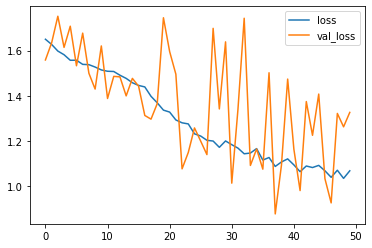

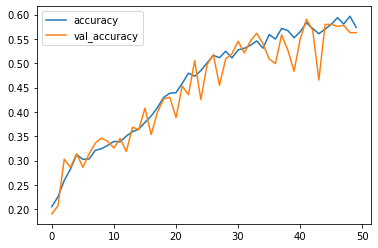

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
import pickle

In [ ]:
model.save('emotion_recognition_model2.h5')

In [ ]:
from tensorflow import keras

In [ ]:
models=keras.models.load_model('emotion_recognition_model1.h5')

In [ ]:
test_gen=test_generator.flow_from_directory(data_test_path,
                                                 target_size=(48,48),
                                                 batch_size=16,
                                                class_mode='categorical',
                                                subset='training',
                                                color_mode='grayscale'
                                                 )

In [ ]:
y_val=test_gen.labels
print(y_val)
print(len(y_val))

In [ ]:
Y_pred_tta=model.predict(test_gen)

In [ ]:
print(Y_pred_tta)

In [ ]:
import itertools
from sklearn.metrics import classification_report
classification_report( np.argmax(y_val, axis=1), np.argmax(Y_pred_tta, axis=1))

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(Y_pred_tta, axis=1))

cm_plot_label =['actual','predicted']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

In [ ]:
import cv2
import numpy as np

In [ ]:
face_Cascade=cv2.CascadeClassifier('D:\haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)

while(True):
    ret,frame=cap.read()
    cv2.imshow('p',frame)

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_Cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in faces:
        img=frame[y:y+h,x:x+w]
        
        print(img.shape)
        img=cv2.resize(img,(48,48))
        cv2.imshow('face',img)
        image = np.expand_dims(img, axis=0)
        '''
        img=np.reshape(img, (48,48))
        #pixels = row[1]  # In dataset,row heading was 'pixels'    
        img = np.array(img.split()) 
        image = np.zeros((48,48,3))  # empty matrix
        image[:,:,0] = img
        image[:,:,1] = img
        image[:,:,2] = img
        imag=image.astype(np.uint8)
        '''
        flag=models.predict(image)
        print(flag)
        print(0.6679435e-09)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),1)
        #cv2.putText(frame,features[flag],(x,y),cv2.FONT_HERSHEY_PLAIN,1.5,(0,255,0),2)
        cv2.imshow("detection",frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
        
        